# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
import random 
simple_data=[random.randint(1, 101) for _ in range(50)]
print (simple_data)

with open("simple_data.txt", "w") as file:
    for number in simple_data:
        file.write(str(number) + '\n') 


[40, 8, 99, 58, 97, 3, 85, 33, 79, 82, 66, 77, 57, 58, 52, 44, 12, 49, 24, 1, 95, 22, 13, 65, 21, 70, 41, 70, 84, 89, 68, 3, 18, 8, 58, 52, 72, 21, 67, 64, 81, 16, 37, 25, 73, 41, 84, 78, 5, 55]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
m=np.random.randint(1,101,(5,5))
print(f"Matrix of 5x5: \n{m}")

with open("data.txt","w") as file:
    for row in m:
        file.write(" ".join(map(str, row)) + "\n")

Matrix of 5x5: 
[[56 55 97 73 85]
 [47 64 56 32 53]
 [79 53 46 46 34]
 [13 49 93 31 55]
 [ 9 21 95 51 92]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
with open("data.txt", "r") as file:
    lines = file.readlines()

with open("data.csv", "w") as csvfile:
    for line in lines:
        csvfile.write(line.strip().replace(" ", ",") + "\n")

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [11]:
with open("credit_card.dat", "rb") as file:
    data = file.read()
bits = "".join(f"{byte:08b}" for byte in data) #Los datos del archivo binario se leen como bytes. 
#Cada byte se convierte en una cadena de 8 bits con f"{byte:08b}
characters = [bits[i:i+6] for i in range(0, len(bits) - 4, 6)]
credit_card_numbers = "".join(chr(int(char, 2)) for char in characters) #Usamos chr(int(char, 2)) para transformar cada grupo de 6 bits en un carácter.
print(credit_card_numbers)

01000 01 0 0 00 1000101 0 00101010 1 0 00000010 1 1 (1 01 0 1 11 11 0 10 1 0 1 1 1 11 0 1 01 01 11 1 1 0 1 0 1 0 1 1 1 1 10#1 1111 11 10 01 01 01 01 00 0101 01 01 00 01111101 10 
0 000000 1 0 0010 00001 0 001010 000 0 0010 10 10 0 1 (1 0 1 1 1 01 0 1 0 1 01 1 1 0 10 1 0 1 01 1 1 1 1 0 1 0 1 1 1 11 1 1 0 10#101 01 1110 01 11 01 1110 01 0111 0100 0111 11 01 10 
0 101010 0 0 01 0

In [14]:
import pandas as pd

    # Convertir cada byte a su representación binaria de 8 bits
bit_string = ''.join(f"{byte:08b}" for byte in data)

# Lista para almacenar los caracteres decodificados
decoded_chars = []

    # Extraer caracteres de 6 bits ignorando los últimos 4 bits de cada 10 bits
for i in range(0, len(bit_string), 10):  # Procesar en bloques de 10 bits
    char_bits = bit_string[i:i+6]  # Tomar solo los primeros 6 bits
    char_value = int(char_bits, 2)  # Convertir a número entero
    decoded_chars.append(chr(char_value))  # Convertir a carácter ASCII

    # Unir los caracteres en líneas organizadas
decoded_text = ''.join(decoded_chars).strip()
card_numbers = decoded_text.split("\n")  # Separar líneas para números de tarjeta

    # Filtrar solo líneas con números de tarjetas de crédito válidas (mínimo 13-16 dígitos)
card_numbers = [num.strip() for num in card_numbers if num.strip().isdigit() and 13 <= len(num.strip()) <= 16]

    # Imprimir los números de tarjeta decodificados correctamente
print("\n".join(card_numbers))

#NO SE PUDO RESOLVER

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [17]:
import json
import pandas as pd

# Cargar el archivo JSON
file_path = "/mnt/c/Users/macas/Desktop/High level programming/user_data.json"

with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Filtrar los datos para incluir solo los registros con "CreditCardType" igual a "American Express"
filtered_data = [entry for entry in data if entry.get("CreditCardType") == "American Express"]

# Convertir los datos filtrados en un DataFrame de pandas
df_filtered = pd.DataFrame(filtered_data)

# Guardar los datos en un archivo CSV
csv_output_path = "/mnt/c/Users/macas/Desktop/High level programming/filtered_american_express.csv"
df_filtered.to_csv(csv_output_path, index=False)

# Mostrar los primeros registros filtrados
print("Primeros registros filtrados:")
print(df_filtered.head())

# Mostrar la ruta del archivo CSV generado
print("\nArchivo CSV guardado en:", csv_output_path)


Primeros registros filtrados:
   ID             JobTitle                      EmailAddress  \
0   2  Investment  Advisor      Clint_Thorpe5003@bulaffy.com   
1  12       Retail Trainee  Phillip_Carpenter9505@famism.biz   
2  28      Project Manager       Russel_Graves1378@extex.org   
3  39          Stockbroker      Leanne_Newton1268@typill.biz   
4  57       Budget Analyst         Tony_Giles1960@iatim.tech   

   FirstNameLastName           CreditCard    CreditCardType  
0       Clint Thorpe  7083-8766-0251-2345  American Express  
1  Phillip Carpenter  3657-0088-0820-5247  American Express  
2      Russel Graves  6718-4818-8011-6024  American Express  
3      Leanne Newton  5438-0816-4166-4847  American Express  
4         Tony Giles  8130-3425-7573-7745  American Express  

Archivo CSV guardado en: /mnt/c/Users/macas/Desktop/High level programming/filtered_american_express.csv


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [18]:
import pandas as pd

# URL del archivo CSV
file_url = "https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"

# Cargar el archivo CSV con pandas
df_mushrooms = pd.read_csv(file_url)

# Explorar la información del dataset
print("Información del dataset:")
print(df_mushrooms.info())

# Mostrar las primeras filas del dataset
print("\n Primeras filas del dataset:")
print(df_mushrooms.head())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-abo

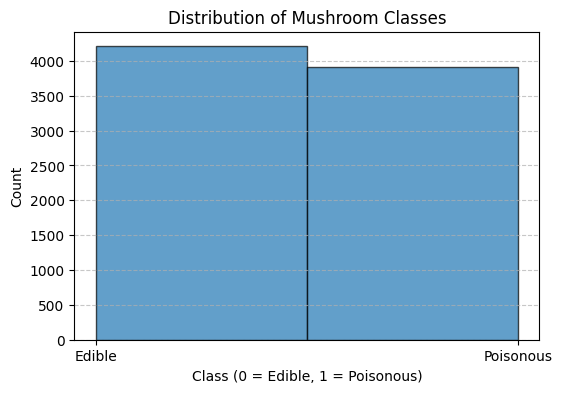

In [19]:
import matplotlib.pyplot as plt

# Crear el histograma de la columna 'class'
plt.figure(figsize=(6, 4))
plt.hist(df_mushrooms["class"], bins=2, edgecolor="black", alpha=0.7)
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.title("Distribution of Mushroom Classes")
plt.xticks([0, 1], ["Edible", "Poisonous"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


In [ ]:
#The istogram shows the distribution of the column class that represents 2 categories:
#0 = Edible mushrooms 
#1 = Poisonous mushrooms
#The distribution is almost equal, quantity similar on the dataset
#Sugires dataset is good to a model of classifcation, the clasess are not too much debalanced.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [21]:
# Intentar cargar el archivo remoto
file_url = "https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"

try:
    # Leer el archivo CSV con pandas
    df_regression = pd.read_csv(file_url)

    # Mostrar información del dataset
    print("🔍 Información del dataset:")
    print(df_regression.info())

    # Mostrar las primeras filas
    print("\n🔍 Primeras filas del dataset:")
    print(df_regression.head())

except Exception as e:
    print(f"Error: {e}")


🔍 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        2000 non-null   float64
 1   features_1   2000 non-null   float64
 2   features_2   2000 non-null   float64
 3   features_3   2000 non-null   float64
 4   features_4   2000 non-null   float64
 5   features_5   2000 non-null   float64
 6   features_6   2000 non-null   float64
 7   features_7   2000 non-null   float64
 8   features_8   2000 non-null   float64
 9   features_9   2000 non-null   float64
 10  features_10  2000 non-null   float64
 11  features_11  2000 non-null   float64
 12  features_12  2000 non-null   float64
 13  features_13  2000 non-null   float64
 14  features_14  2000 non-null   float64
 15  features_15  2000 non-null   float64
 16  features_16  2000 non-null   float64
 17  features_17  2000 non-null   float64
 18  features_18  2000 non

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares (scatter plots) entre features_1, features_2 y features_3
sns.pairplot(df_regression, vars=["features_1", "features_2", "features_3"], diag_kind="hist")

# Mostrar los gráficos
plt.show()
#USANDO SEABORN

ModuleNotFoundError: No module named 'seaborn'

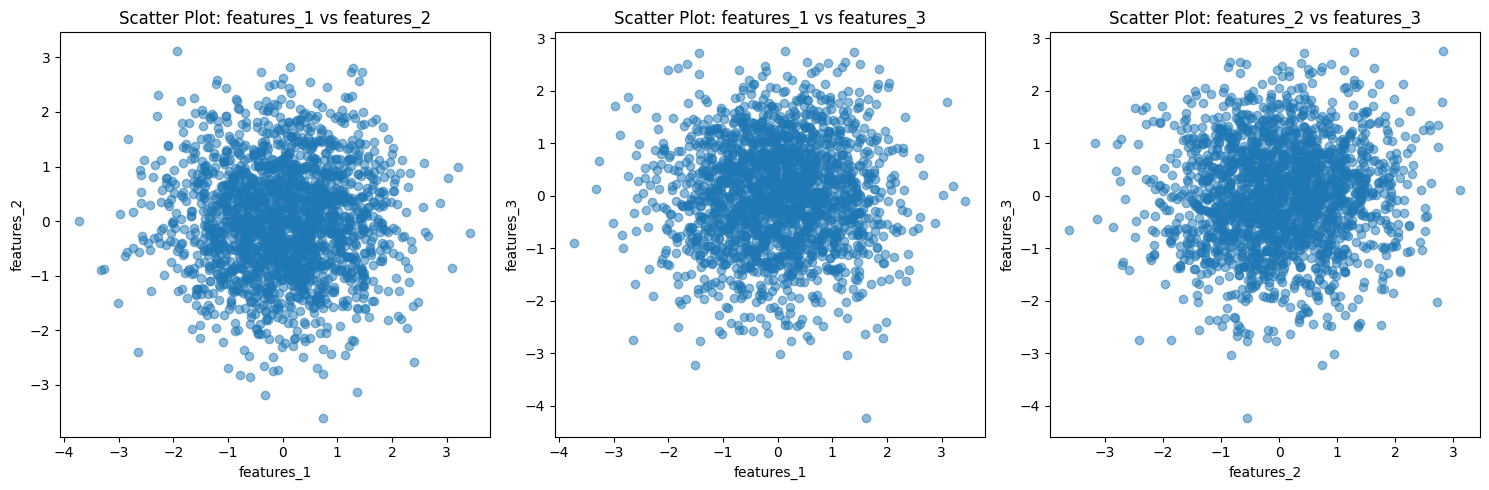

In [23]:
# Crear gráficos de dispersión manualmente con matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot de features_1 vs features_2
axes[0].scatter(df_regression["features_1"], df_regression["features_2"], alpha=0.5)
axes[0].set_xlabel("features_1")
axes[0].set_ylabel("features_2")
axes[0].set_title("Scatter Plot: features_1 vs features_2")

# Scatter plot de features_1 vs features_3
axes[1].scatter(df_regression["features_1"], df_regression["features_3"], alpha=0.5)
axes[1].set_xlabel("features_1")
axes[1].set_ylabel("features_3")
axes[1].set_title("Scatter Plot: features_1 vs features_3")

# Scatter plot de features_2 vs features_3
axes[2].scatter(df_regression["features_2"], df_regression["features_3"], alpha=0.5)
axes[2].set_xlabel("features_2")
axes[2].set_ylabel("features_3")
axes[2].set_title("Scatter Plot: features_2 vs features_3")

# Ajustar diseño
plt.tight_layout()
plt.show()


In [ ]:
#Scatter Plot: features_1 vs features_2
#The points are somewhat dispersed but show a weak correlation.
#There is no clear linear relationship, suggesting that features_1 and features_2 may not be strongly dependent.

#Scatter Plot: features_1 vs features_3
#A stronger correlation is noticeable here compared to the previous plot.
#The points follow a more defined trend, indicating that features_1 and features_3 have some level of relationship.

#Scatter Plot: features_2 vs features_3
#The data points appear widely spread, with no obvious pattern.
#This suggests that features_2 and features_3 might be independent or weakly correlated.

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [25]:
# Cargar nuevamente el archivo mushrooms_categorized.csv
file_path_mushrooms = "/mnt/c/Users/macas/Desktop/High level programming/mushrooms_categorized.csv"

# Leer el archivo CSV con pandas
df_mushrooms = pd.read_csv(file_path_mushrooms)

# Convertir el DataFrame a JSON
json_output_path = "/mnt/c/Users/macas/Desktop/High level programming/mushrooms_categorized.json"
df_mushrooms.to_json(json_output_path, orient="records", indent=4)

# Confirmar la ubicación del archivo JSON generado
print("File JSON save in:", json_output_path)


File JSON save in: /mnt/c/Users/macas/Desktop/High level programming/mushrooms_categorized.json
